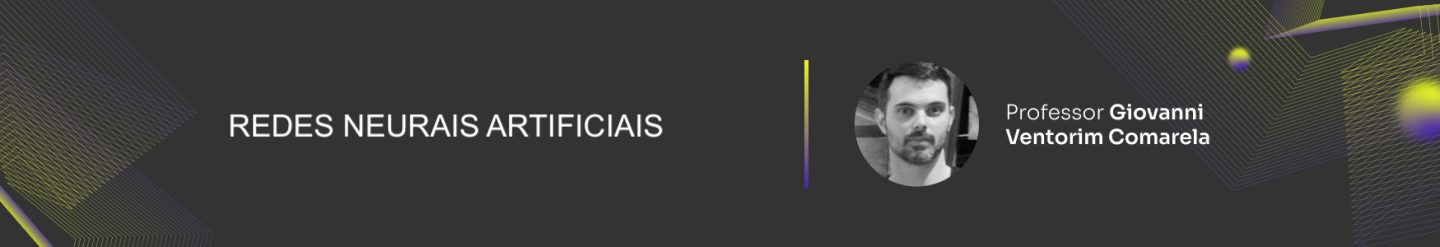

# Laboratório 1

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das duas primeiras semanas da disciplina.

Para isso, vamos utilizar o conjunto de dados [``Fashion MNIST``](https://keras.io/api/datasets/fashion_mnist/).

O conjunto de dados contém imagens de 10 categorias de peças de vestuário.

São 70 mil imagens de tamanho 28x28 (píxeis) em escala de cinza, distribuídas nas 10 categorias.

## Obtenção dos dados

Para obter o conjunto de dados, podemos utilizar a própria biblioteca `Keras`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.datasets import fashion_mnist
sns.set()

2025-06-03 16:49:12.998129: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-03 16:49:13.016009: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 16:49:13.131228: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 16:49:13.235965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748980153.322610   77226 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748980153.34

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Observe que o conjunto de dados já vem dividido em porções de treinamento e teste. Assim, essa é uma etapa com a qual você não vai precisar se preocupar. A seguir, o tamanho de cada porção do conjunto de dados.

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Veja que cada elemento do conjunto de dados é uma matriz com 28 linhas e 28 colunas. Cada matriz representa uma imagem, em escala de cinza, de uma peça de vestuário. São 10 tipos de peças no conjunto de dados, i.e., são 10 classes.

As figuras abaixo apresentam as classes e os tipos de peças de vestuário contidas no conjunto de dados.

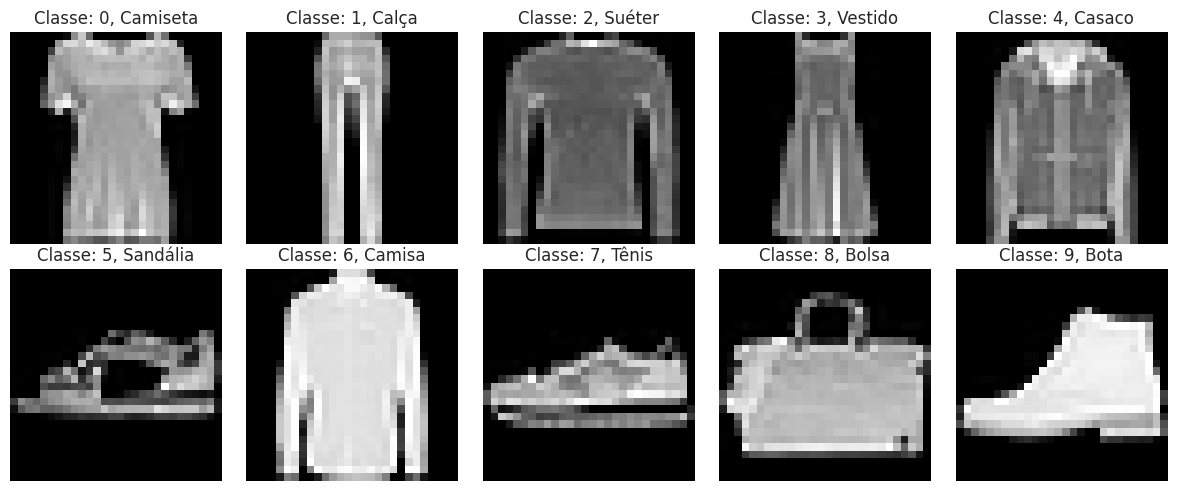

In [5]:
#@title
labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_train[y_train == i][3]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Classe: %d, %s" % (i, labels[i]))
    plt.axis('off')
plt.tight_layout();

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Parte I: Preparação dos Dados [20 pontos - Todos os itens têm o mesmo valor]

### Item 1.1

Cada imagem dos conjuntos de treino e teste é uma matriz 28x28. Como visto na disciplina, MLPs precisam que a entrada seja um vetor, não uma matriz.

Transforme os elementos dos conjuntos de treino e teste em objetos de tamanho 784 (28 * 28 = 784).

**Dica:** use a função [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [ ]:
# Escreva sua resposta aqui

# o "-1" calcula automaticamente o numero de colunas necessarias dado a proporção da matriz
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Antes de continuar, é importante que saída da célula de código acima seja como mostrado na figura abaixo.

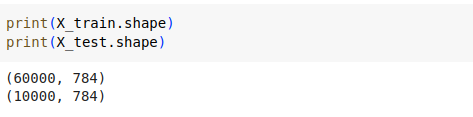

Após isso, é importante converter os dados para ponto flutuante e normalizar os valores. O código abaixo já faz isso para você.

In [13]:
# não modifique aqui.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Item 1.2

Codifique os rótulos do conjunto de treinamento utilizando a codificação *one-hot*. Os rótulos codificados devem ser armazenados em uma variável com nome `y_train_encoded`.

**Dica:** use a classe [CategoryEncoding](https://keras.io/api/layers/preprocessing_layers/categorical/category_encoding/) do `Keras`.

In [18]:
# Escreva sua resposta aqui
encoder = keras.layers.CategoryEncoding(

  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_train)),
  output_mode="one_hot"
)

y_train_encoded = encoder(y_train)

print(y_train_encoded)


tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 10), dtype=float32)


## Parte II: Definição, treinamento e avaliação de um modelo simples [40 pontos - Todos os itens têm o mesmo valor]

### Item 2.1

Defina um modelo, em `Keras`, apenas com camada de entrada e uma camada de saída para a tarefa de classificação multiclasse. Como função de ativação na camada de saída, utilize a *softmax*.

In [ ]:
# Escreva sua resposta aqui
model = keras.Sequential([
  keras.layers.Input((784,)), #Tamanho do vetor, atencao: Tem uma virgula e logo em seguida, nada.
  keras.layers.Dense(units=10, activation="softmax")
])

### Item 2.2

Utilize o método [compile](https://keras.io/api/models/model_training_apis/) para preparar o modelo e definir a função de perda como sendo a Entropia Cruzada Categórica (*Categorical Cross-Entropy*).

In [23]:
# Escreva sua resposta aqui
model.compile(loss = "categorical_crossentropy")

### Item 2.3

Treine o modelo utilizando o método [fit](https://keras.io/api/models/model_training_apis/). Além dos dados de treinamento, informe:
- `epochs = 100` (veremos o que isso significa na próxima semana);
- verbose = 2 (para você poder acompanhar o andamento do processo de treinamento).

In [24]:
# Escreva sua resposta aqui
model.fit(X_train, y_train_encoded, epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 2s - 1ms/step - loss: 0.5877
Epoch 2/100
1875/1875 - 2s - 1ms/step - loss: 0.4664
Epoch 3/100
1875/1875 - 2s - 934us/step - loss: 0.4447
Epoch 4/100
1875/1875 - 2s - 907us/step - loss: 0.4341
Epoch 5/100
1875/1875 - 2s - 953us/step - loss: 0.4261
Epoch 6/100
1875/1875 - 2s - 983us/step - loss: 0.4209
Epoch 7/100
1875/1875 - 2s - 1ms/step - loss: 0.4184
Epoch 8/100
1875/1875 - 2s - 964us/step - loss: 0.4147
Epoch 9/100
1875/1875 - 2s - 931us/step - loss: 0.4122
Epoch 10/100
1875/1875 - 2s - 928us/step - loss: 0.4107
Epoch 11/100
1875/1875 - 2s - 1ms/step - loss: 0.4100
Epoch 12/100
1875/1875 - 2s - 938us/step - loss: 0.4074
Epoch 13/100
1875/1875 - 2s - 1ms/step - loss: 0.4059
Epoch 14/100
1875/1875 - 2s - 1ms/step - loss: 0.4054
Epoch 15/100
1875/1875 - 2s - 1ms/step - loss: 0.4040
Epoch 16/100
1875/1875 - 2s - 1ms/step - loss: 0.4029
Epoch 17/100
1875/1875 - 2s - 1ms/step - loss: 0.4027
Epoch 18/100
1875/1875 - 2s - 1ms/step - loss: 0.4013
Epoch 19/100
1875/187

### Item 2.4

Use o método [predict](https://keras.io/api/models/model_training_apis/) para computar a saída do modelo para os elementos do conjuto de teste.

Lembrem, para cada elemento do conjunto de teste, a saída representa as probabilidades do elemento pertencer a cada classe.

In [27]:
# Escreva sua resposta aqui
pred = model.predict(X_test)
pred.size

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step


100000

### Item 2.5

Use o método [argmax](https://numpy.org/doc/2.2/reference/generated/numpy.argmax.html) para identificar o rótulo (predito) mais provável, de acordo com a saída do modelo (Item anterior), para cada elemento do conjunto de teste.

In [30]:
# Escreva sua resposta aqui
y_pred = np.argmax(pred, axis=1)

print(y_pred, y_pred.size)

[9 2 1 ... 6 1 5] 10000


### Item 2.6

Com os rótulos preditos, utilize o método [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para apresentar diferentes métricas de avaliação do modelo criado no conjunto de teste.

In [32]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.75      0.70      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.67      0.84      0.75      1000
           5       0.94      0.93      0.93      1000
           6       0.65      0.52      0.58      1000
           7       0.90      0.95      0.93      1000
           8       0.94      0.93      0.93      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Item 2.7

Utilize a classe [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), apresente a matriz de confusão dos resultados do classificador no conjunto de teste.
Não deixe de colocar os rótulos/nomes das classes nos eixos X e Y de seu gráfico.

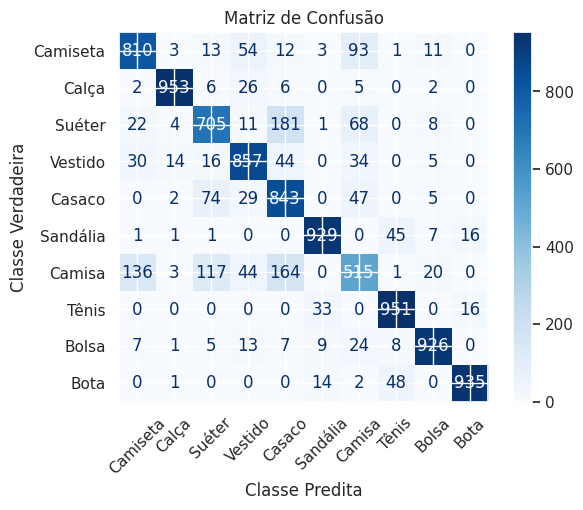

In [42]:
# Escreva sua resposta aqui
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

## Parte III: Definição, treinamento e avaliação de um modelo mais complexo [20 pontos - Todos os itens têm o mesmo valor]

### Item 3.1

Defina um modelo, em Keras, com uma camada oculta com 128 unidades.
Como função de ativação na camada de saída, utilize a *softmax*.
Como função de ativação na camada oculta, utilize a ReLU.

In [43]:
# Escreva sua resposta aqui
model = keras.Sequential([
  keras.layers.Input((784,)),
  keras.layers.Dense(units = 128, activation="relu"),
  keras.layers.Dense(units=10, activation="softmax")
])

### Item 3.2

Repita o Item 2.2, mas agora, para o modelo definido no Item 3.1.

In [44]:
# Escreva sua resposta aqui
model.compile(loss = "categorical_crossentropy")

### Item 3.3

Repita o Item 2.3, mas agora, para o modelo do Item 3.1.

In [45]:
# Escreva sua resposta aqui
model.fit(X_train, y_train_encoded, epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 4s - 2ms/step - loss: 0.5083
Epoch 2/100
1875/1875 - 3s - 2ms/step - loss: 0.3772
Epoch 3/100
1875/1875 - 3s - 2ms/step - loss: 0.3439
Epoch 4/100
1875/1875 - 3s - 2ms/step - loss: 0.3264
Epoch 5/100
1875/1875 - 3s - 2ms/step - loss: 0.3132
Epoch 6/100
1875/1875 - 4s - 2ms/step - loss: 0.3016
Epoch 7/100
1875/1875 - 3s - 2ms/step - loss: 0.2933
Epoch 8/100
1875/1875 - 3s - 2ms/step - loss: 0.2819
Epoch 9/100
1875/1875 - 3s - 2ms/step - loss: 0.2783
Epoch 10/100
1875/1875 - 3s - 2ms/step - loss: 0.2720
Epoch 11/100
1875/1875 - 3s - 2ms/step - loss: 0.2683
Epoch 12/100
1875/1875 - 3s - 2ms/step - loss: 0.2604
Epoch 13/100
1875/1875 - 3s - 2ms/step - loss: 0.2575
Epoch 14/100
1875/1875 - 3s - 2ms/step - loss: 0.2523
Epoch 15/100
1875/1875 - 3s - 2ms/step - loss: 0.2463
Epoch 16/100
1875/1875 - 4s - 2ms/step - loss: 0.2434
Epoch 17/100
1875/1875 - 3s - 2ms/step - loss: 0.2419
Epoch 18/100
1875/1875 - 3s - 2ms/step - loss: 0.2364
Epoch 19/100
1875/1875 - 3s - 2ms/ste

### Item 3.4

Repita o Item 2.4, mas agora, para o modelo definido no Item 3.1.

In [46]:
# Escreva sua resposta aqui
pred = model.predict(X_test)
pred.size

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


100000

### Item 3.5

Repita o Item 2.5, mas agora, para o modelo definido no Item 3.1.

In [47]:
# Escreva sua resposta aqui
y_pred = np.argmax(pred, axis=1)

print(y_pred, y_pred.size)

[9 2 1 ... 8 1 5] 10000


### Item 3.6

Repita o Item 2.6, mas agora, para o modelo definido no Item 3.1.

In [48]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.79      0.77      1000
           3       0.87      0.90      0.88      1000
           4       0.77      0.81      0.79      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.64      0.69      1000
           7       0.96      0.90      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.89      0.98      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### Item 3.7

Repita o Item 2.7, mas agora, para o modelo definido no Item 3.1.

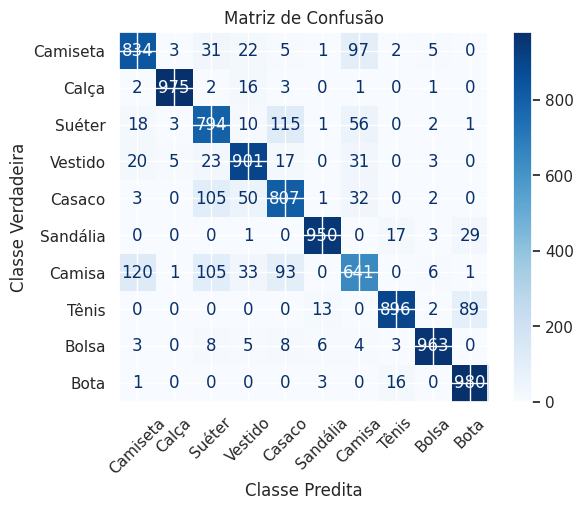

In [49]:
# Escreva sua resposta aqui
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

## Parte IV: Interpretação [20 pontos - Todos os itens têm o mesmo valor]

### Item 4.1

Com os resultados obtidos, há boa evidência de que o modelo da Parte III é melhor do que o Modelo da Parte II? Justifique sua resposta.

**Escreva sua resposta aqui:**

O modelo 2 tem uma precisão ligeraimente superior ao modelo 1, com 87% em acurácia, precisão, recall e f1-score (médias), mas, não é uma boa evidência, dado que o modelo 1 gir aem torno de 83% dos mesmos atributos

### Item 4.2

Observe "com calma" a matriz de confusão. Existe algum padrão nos erros mais comuns? Há alguma justificativa intuitiva para os erros mais comuns ou os erros são puramente aleatórios?

**Escreva sua resposta aqui:**

Sim, existe um padrão nos erros.

Por exemplo: os modelos confundem frequentemente Casaco com Camisa, Suéter com Casaco, Camiseta com Camisa, ou seja, roupas que tem formas e desenhos semelhantes, Não são erros aleatórios. 